# Sampleo por Importancia con Re-muestreo (SIR)
En el contexto de muestreo de variables aleatorias cuando no podemos aplicar métodos directos como la función inversa o el Box-Muller, el Sampleo por Importancia con Re-muestreo (SIR) es una técnica útil. Este método nos permite obtener muestras aproximadas de una distribución objetivo $p(z)$ cuando es difícil muestrear directamente de ella, utilizando una distribución de propuesta más fácil $q(z)$.



Los pasos clave son:

1. Distribución de Propuesta q(z): Debe ser fácil de muestrear y cubrir el soporte de p(z).

2. Muestreo de q(z): Generar $L$ muestras $z_1, z_2 , \dots, z_L$ de $q(z)$.

3. Pesos de Importancia: Calcular los pesos $w_1, w_2, \dots, w_L$ para ajustar las muestras hacia p(z).

4. Re-muestreo: Seleccionar $N$ nuevas muestras utilizando los pesos.

5. Generar el histograma normalizado.




# Ejercicio 1

Asumiendo que $p(x) =f_X(x)$ donde $X \sim e(3)$.

a) Realizar $z_1, z_2, \dots, z_L$ muestras a partir de una distribucion $q(z)$ facil de samplear (que no sea exponencial).  
b) Ordenar los $z_i$   
c) Calcular sus pesos $w_i = \frac{p(z_i)}{q(z_i)}$   
d) Calcular su función **acumulada** $F_Z(z)$ siendo $Z$ la distribucion a partir de las muestras $z_1, z_2, \dots, z_N$



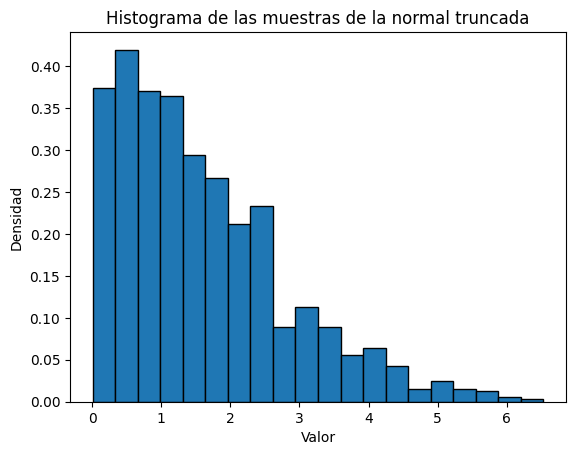

In [7]:
from scipy.stats import expon, truncnorm, norm, ksone
import numpy as np
import matplotlib.pyplot as plt

# Definir los límites de la distribución truncada
a, b = 0, np.inf

# Crear la distribución truncada
trunc_normal = truncnorm(a, b, loc=0, scale=1)

def q(x):
    return trunc_normal.pdf(x) * 2

# Generar muestras de q(x)
def sample_q(size):
    return trunc_normal.rvs(size=size) * 2

x = expon(scale=1/3)

N = 1000
L = [10, 25, 50, 200]

# Tomar muestras de q(x)
samples_q = sample_q(N)
samples_q.sort()

# Calcular los pesos wi
weights = np.zeros(N)
for i in range(N):
    weights[i] = x.pdf(samples_q[i]) / q(samples_q[i])

def F(z):
    acumulada = 0
    for i in range(N):
        if samples_q[i] <= z:
            acumulada += weights[i]
    return acumulada

# Graficar el histograma de las muestras
plt.hist(samples_q, bins=20, edgecolor='black', density=True)
plt.title('Histograma de las muestras de la normal truncada')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()

# Ejercicio 2

Utilizar $F_Z(z)$ calculada del punto anterior para realizar un test de **KS** con $H: F_Z = F_X$.

Probar con: L=10, L=25, L=50, L= 200

Notas: Recordar que el test de K-S se calcula a partir de

$$D^* = \text{Max}_{zi} \{ |F_Z(z_i) - F_X(z_i) | \},$$
$$D_0 = K_{\varepsilon}$$

y el test rechaza si $D^* > D_0$, siendo $D_0$ el cualtil que deja area $ɛ$ a la derecha.




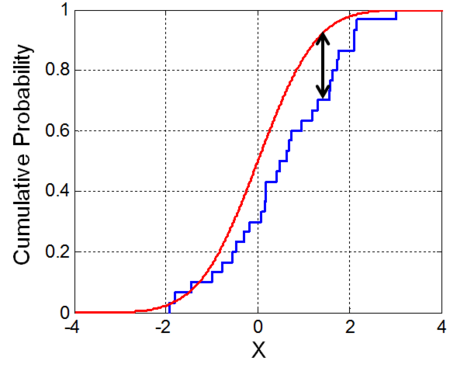

In [55]:
# Test de Kolmogorov-Smirnov
import numpy as np
from scipy.stats import ksone
from clase3 import test_ks

resultados = []
def dn(n): return ksone(n)
e = 0.05

for l in L:
    muestras_x = x.rvs(size=l)
    
    # Ordenar las muestras
    muestras_x.sort()
    
    # Calcular la ECDF
    ecdf = [F(z) for z in muestras_x]
    
    # Calcular la CDF teórica
    cdf_teorica = x.cdf(muestras_x)

    # Calcular la estadística D
    D = np.max(np.abs(ecdf - cdf_teorica))
    
    proba = 1 - dn(l).cdf(D)
    
    # Determinar si se acepta o rechaza la hipótesis nula
    resultado = "Rechazar" if proba < e else "No rechazar"
    
    # Guardar el resultado
    resultados.append((l, D, proba, resultado))

# Imprimir los resultados
print('Resultados del test de Kolmogorov-Smirnov:')
for l, D, proba, resultado in resultados:
    print(f'Tamaño de muestra: {l}, Estadística D: {D:.4f}, Probabilidad: {proba:.4f}, Resultado: {resultado}')

Resultados del test de Kolmogorov-Smirnov:
Tamaño de muestra: 10, Estadística D: 261.0000, Probabilidad: 0.0000, Resultado: Rechazar
Tamaño de muestra: 25, Estadística D: 253.5262, Probabilidad: 0.0000, Resultado: Rechazar
Tamaño de muestra: 50, Estadística D: 269.6362, Probabilidad: 0.0000, Resultado: Rechazar
Tamaño de muestra: 200, Estadística D: 264.5039, Probabilidad: 0.0000, Resultado: Rechazar
